## Código de honor


> "Al entregar la solución de este parcial, yo, __Santiago Martínez Novoa__ con código __202112020__ me comprometo a no conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Ni usaré alguna IA para resolver las preguntas del parcial. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este parcial"

## Respuestas a las preguntas del parcial




## Anexo Notebook ejecutado

#### Diccionario de los datos

- marca: Marca del vehículo
- modelo: Modelo particular del vehículo
- version: Versión del modelo del vehículo
- precio: Precio de venta real del vehículo
- precio_financiado: Precio de venta del vehículo cuando la compra es financiada por AlpesAutos
- combustible: Tipo de combustible del motor
- año: Año de fabricación del vehículo
- kms: Kilómetros recorridos del vehículo (kilometraje)
- potencia: Potencia del motor del vehículo
- puertas: Número de puertas del vehículo
- transmision: Tipo de transmisión del vehículo
- color: Color del vehículo
- fecha_publicacion: Fecha de publicación del vehículo en el sistema de ventas de AlpesAutos



## 0. Preparación inicial
### 0.1. Importar librerías

In [139]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Deep data analysis
from ydata_profiling import ProfileReport

# Model training
import sklearn
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.calibration import cross_val_predict
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score, ConfusionMatrixDisplay, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay
from sklearn.metrics.cluster import silhouette_samples, silhouette_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import plot_tree, DecisionTreeClassifier, export_graphviz

# Other
import graphviz
from sklearn.cluster import KMeans


#Librerías extras
import itertools
import os

from datetime import datetime

print(f"La versión de sklearn es: {sklearn.__version__}")

La versión de sklearn es: 1.4.1.post1


### 0.2. Carga de datos

In [140]:
data = pd.read_excel('./Data/datos_coches_alpesautos_parcial.xlsx')

data.head()

marca   modelo                                          version  precio  \
0      BMW  Serie 1                             BMW Serie 1 116d 5p.   14000   
1   TOYOTA    Auris      TOYOTA Auris 120D Active Touring Sports 5p.   13500   
2     FORD    Focus      FORD Focus 1.6 TIVCT 92kW Trend Sportbr 5p.   10950   
3  PORSCHE      911                  PORSCHE 911 CARRERA 4 COUPE 2p.   20990   
4     AUDI       A3  AUDI A3 S line 30 TFSI 85kW 116CV Sportback 5p.   23700   

   precio_financiado combustible   año     kms  potencia puertas transmision  \
0                NaN      Diésel  2014   63000     116.0       5      Manual   
1                NaN      Diésel  2015   33000     124.0       5      Manual   
2             9550.0    Gasolina  2018   19120     125.0       5      Manual   
3                NaN    Gasolina  1999  190000     300.0       2  Automático   
4            21900.0    Gasolina  2019   24900     116.0       5      Manual   

    color   fecha_publicacion  
0    Rojo 2020-11-07 12:55:00  
1  Blanco 2021-01-06 11:35:00  
2   Negro 2021-01-11 18:32:00  
3   Negro 2021-01-13 19:13:00  
4  Blanco 2020-12-23 17:41:00

In [141]:

train = data
train.head()

marca   modelo                                          version  precio  \
0      BMW  Serie 1                             BMW Serie 1 116d 5p.   14000   
1   TOYOTA    Auris      TOYOTA Auris 120D Active Touring Sports 5p.   13500   
2     FORD    Focus      FORD Focus 1.6 TIVCT 92kW Trend Sportbr 5p.   10950   
3  PORSCHE      911                  PORSCHE 911 CARRERA 4 COUPE 2p.   20990   
4     AUDI       A3  AUDI A3 S line 30 TFSI 85kW 116CV Sportback 5p.   23700   

   precio_financiado combustible   año     kms  potencia puertas transmision  \
0                NaN      Diésel  2014   63000     116.0       5      Manual   
1                NaN      Diésel  2015   33000     124.0       5      Manual   
2             9550.0    Gasolina  2018   19120     125.0       5      Manual   
3                NaN    Gasolina  1999  190000     300.0       2  Automático   
4            21900.0    Gasolina  2019   24900     116.0       5      Manual   

    color   fecha_publicacion  
0    Rojo 2020-11-07 12:55:00  
1  Blanco 2021-01-06 11:35:00  
2   Negro 2021-01-11 18:32:00  
3   Negro 2021-01-13 19:13:00  
4  Blanco 2020-12-23 17:41:00

## 1. Entendimiento de los datos

### 1.1. Exploración de los datos

Es fundamental entender el dataset, por lo que primero que se revisará es el diccionario de los datos. Luego de entenderlos se procederá a buscar anomalías en los datos con la ayuda de panmdas profiling y un par de consultas sencillas.

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   marca              1000 non-null   object        
 1   modelo             1000 non-null   object        
 2   version            1000 non-null   object        
 3   precio             1000 non-null   int64         
 4   precio_financiado  466 non-null    float64       
 5   combustible        989 non-null    object        
 6   año                1000 non-null   object        
 7   kms                1000 non-null   int64         
 8   potencia           836 non-null    float64       
 9   puertas            1000 non-null   object        
 10  transmision        999 non-null    object        
 11  color              983 non-null    object        
 12  fecha_publicacion  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usa

Parecen haber 7 variables categóricas y 6 numéricas. Una de estas columnas parece tener problemas por la letra ñ en su nombre (`año`) y clasifica los datos incorrectamente, es necesario que `año` sea una variable numérica y por términos de simplicidad y evitar complejizar el modelo se decide transformar también el tipo de `fecha_publicacion` a object.Esto también sucede para `puertas` y deben ser transformadas. Esto se hará antes de la sección de transformación pero in embargo sera referenciado como la _Decisión 0_

In [143]:
#Cambiar variable fecha_publicacion a object
train['fecha_publicacion'] = train['fecha_publicacion'].astype('str')

train['modelo'] = train['modelo'].astype('str')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marca              1000 non-null   object 
 1   modelo             1000 non-null   object 
 2   version            1000 non-null   object 
 3   precio             1000 non-null   int64  
 4   precio_financiado  466 non-null    float64
 5   combustible        989 non-null    object 
 6   año                1000 non-null   object 
 7   kms                1000 non-null   int64  
 8   potencia           836 non-null    float64
 9   puertas            1000 non-null   object 
 10  transmision        999 non-null    object 
 11  color              983 non-null    object 
 12  fecha_publicacion  1000 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 101.7+ KB


In [144]:

train['año'].value_counts()

año
2019    103
2016     97
2020     86
2017     86
2018     75
2015     62
2014     51
2007     41
2006     40
2005     36
2008     34
2010     32
2009     30
2012     29
2013     29
2011     24
2003     21
2002     20
2004     20
2000     16
1999     13
2001     12
1997      9
1998      6
2021      4
1993      3
1991      3
1992      2
1990      2
1988      2
1989      2
1984      2
1908      1
1995      1
1971      1
2M19      1
1994      1
1996      1
1986      1
2M16      1
Name: count, dtype: int64

In [145]:
train['puertas'].value_counts()

puertas
5         697
4         139
3         100
2          49
Cinco      12
Cuatro      3
Name: count, dtype: int64

Aquí se encuentra porque no se toma la variable año como entero, existen datos que poseen valores erróneos

In [146]:
train.describe()

precio  precio_financiado           kms     potencia
count    1000.000000         466.000000  1.000000e+03   836.000000
mean    15050.508000       18772.098712  1.198723e+05   150.759569
std     13667.341719       12131.086420  1.487831e+05    86.321545
min       400.000000        1490.000000 -4.500000e+01    45.000000
25%      5612.500000       11190.000000  3.500000e+04   110.000000
50%     11990.000000       15942.500000  1.000000e+05   130.000000
75%     19900.000000       21998.750000  1.753715e+05   163.000000
max    119900.000000      109200.000000  2.950000e+06  1500.000000

Aquí ya puede evidenciarse algunas discrepancias de rango con respecto a lo estipulado en el diccionario de datos, por ejemplo en la variable de kilómetro. Será necesario mirarlo más a fondo en la distribución de los datos durante el perfilamiento de los datos.

In [147]:
print(f"El número de atributos es: {train.shape[1]} y el número de instancias es: {train.shape[0]}")

El número de atributos es: 13 y el número de instancias es: 1000


In [148]:
print("Total de registros duplicados iniciales: ",train.duplicated(keep = False).sum())

Total de registros duplicados iniciales:  0


In [149]:
print("Total de registros con valores nulos:\n",train.isnull().sum())

Total de registros con valores nulos:
 marca                  0
modelo                 0
version                0
precio                 0
precio_financiado    534
combustible           11
año                    0
kms                    0
potencia             164
puertas                0
transmision            1
color                 17
fecha_publicacion      0
dtype: int64


In [150]:
print("Porcentaje de valores nulos:\n")
round(100*(train.isnull().sum()/len(train)), 2).sort_values(ascending=False)

Porcentaje de valores nulos:



precio_financiado    53.4
potencia             16.4
color                 1.7
combustible           1.1
transmision           0.1
marca                 0.0
modelo                0.0
version               0.0
precio                0.0
año                   0.0
kms                   0.0
puertas               0.0
fecha_publicacion     0.0
dtype: float64

Debido al alto porcentaje de valores nulos que existe en el Dataset para la columna de `precio_financiado`, es necesario retirarla completamente. Así como para la `potencia` también será necesario pues una imputación de datos no sería coherente dado la definición de esa columna. Para los demás datos al ser tan poco el porcentaje de valores faltantes simplemente se eliminarán los registros.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

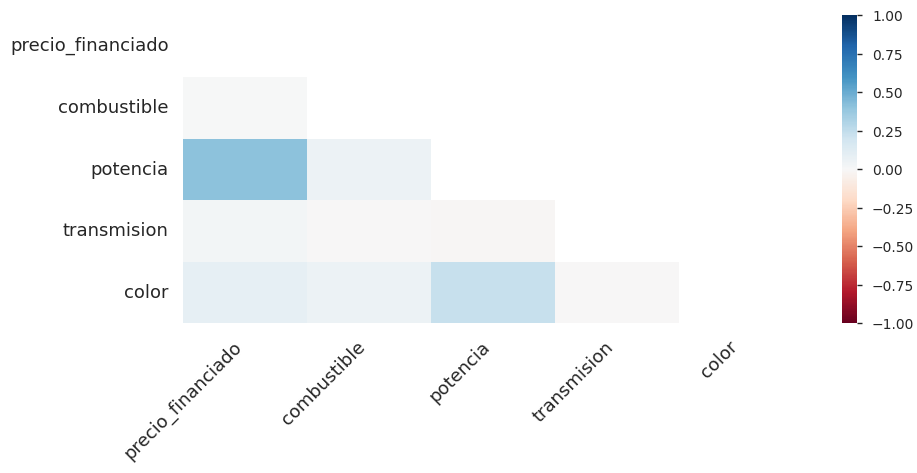

In [151]:
#Profiling del dataset
ProfileReport(train, title="Pandas Profiling Report", explorative=True)


Aquí es posible encontrar que en la columna de `km` existen valores fuera de rango que requieren ser retirados, pues no existe un carro que pueda tener kilometraje negativo.

### Comportamiento variables numéricas

Es necesario revisar las correlaciones para las variables numéricas, de existir una correlación superior a 0.8 se considera lo suficientemente alta como para que una de las columnas tenga que ser eliminada con el objetivo de asegurar la independencia entre las variables independientes y promoviendo a la reducción de dimensionalidad. Conservar únicamente una de las columnas garantiza una representación más coherente de los datos, evitando discrepancias en la interpretación.



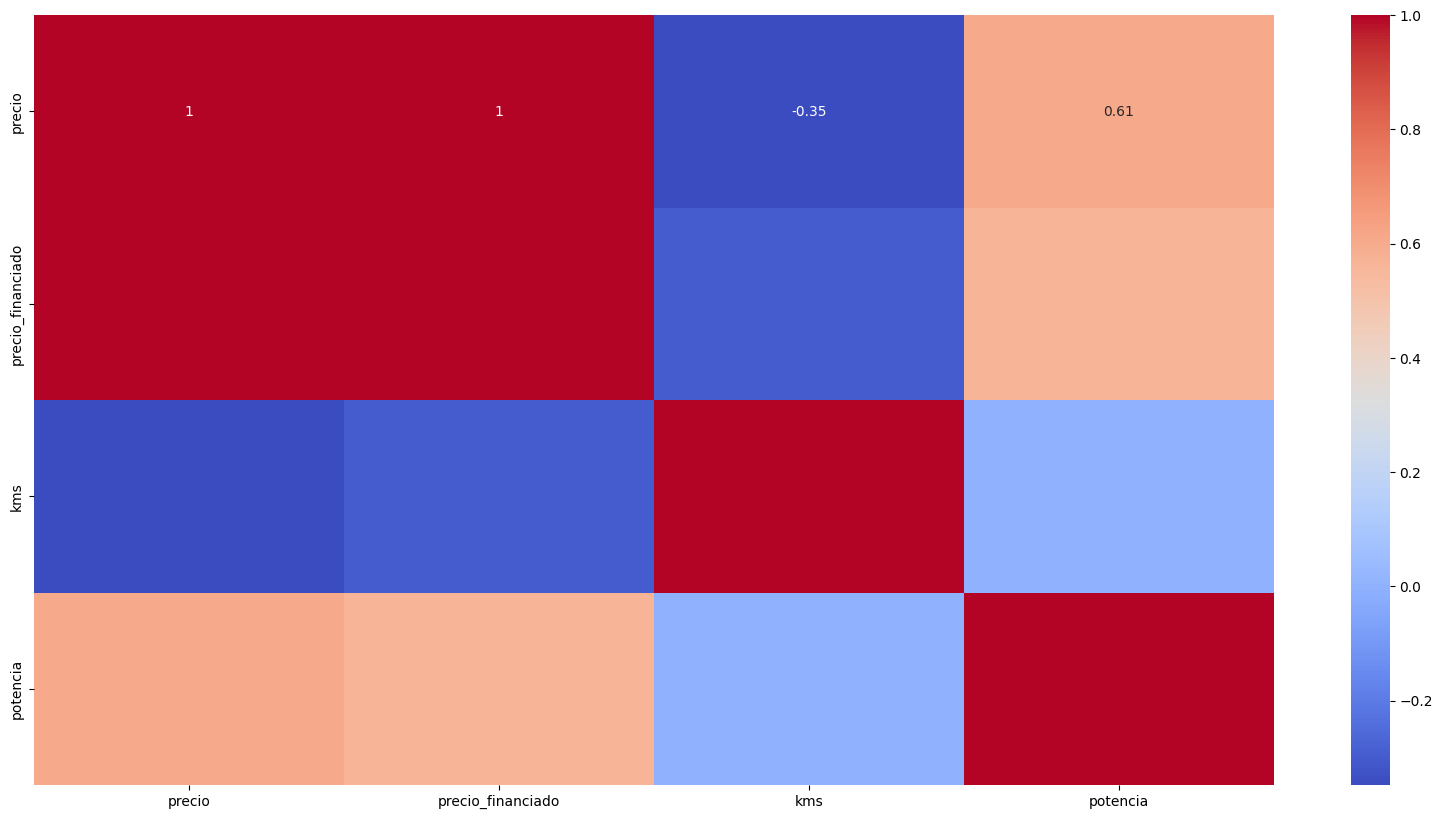

In [152]:
# Filtrar las columnas que son de tipo int o float para quitar las columnas categóricas
numeric_cols = train.select_dtypes(include=['int', 'float'])

# Calcular la matriz de correlación solo para esas columnas
correlation_matrix = numeric_cols.corr()

# Crear el heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [153]:
high_correlation_indices = np.where(np.abs(correlation_matrix) > 0.8)

# Filtrar las correlaciones para evitar duplicados y la diagonal principal
correlations = [(numeric_cols.columns[i], numeric_cols.columns[j], correlation_matrix.iloc[i, j])
                for i, j in zip(*high_correlation_indices) if i != j]
printed = []
# Mostrar las correlaciones mayores a 0.8
for col1, col2, corr in correlations:
    if (col1,col2) not in printed and (col1,col2) not in printed:
        print(f"Correlación entre {col1} y {col2}: {corr}")
        printed.append((col1,col2))
        printed.append((col2,col1))

Correlación entre precio y precio_financiado: 0.9971524070085859


Ya es posible observar que existe una correlación altísima entre `precio` y  `precio_financiado`, por lo que solo se mantendrá la variable de `precio` pues de las dos es la más representativa.

### Comportamiento de las variables categóricas

Como se está utilizando un algoritmo de regresión lineal, este no puede trabajar con variables categóricas y es necesario determinar qué variables pueden ser transformadas para que sean tomadas en cuenta y se puedan transformar correctamente. 

In [154]:
#Determinar unicidad en los datos de las columnas categoricas en porcentaje
categorical_cols = train.select_dtypes(include=['object'])

#Mostrar los valores únicos de las columnas categóricas
for col in categorical_cols.columns:
    print(f"Columna: {col}, Valores únicos:{categorical_cols[col].nunique()}, Valores únicos(%): {round(100*categorical_cols[col].nunique()/categorical_cols.shape[0], 2)}%")

Columna: marca, Valores únicos:44, Valores únicos(%): 4.4%
Columna: modelo, Valores únicos:331, Valores únicos(%): 33.1%
Columna: version, Valores únicos:877, Valores únicos(%): 87.7%
Columna: combustible, Valores únicos:7, Valores únicos(%): 0.7%
Columna: año, Valores únicos:40, Valores únicos(%): 4.0%
Columna: puertas, Valores únicos:6, Valores únicos(%): 0.6%
Columna: transmision, Valores únicos:2, Valores únicos(%): 0.2%
Columna: color, Valores únicos:163, Valores únicos(%): 16.3%
Columna: fecha_publicacion, Valores únicos:986, Valores únicos(%): 98.6%


Como se puede observar, la variable de `fecha_publicación` tiene una cardinalidad bastante alta y por lo tanto es necesario eliminarla o transformarla para que haya menos cardinalidad en los datos. Como puede que la fecha de publicación sea importante porque existen temporadas donde se compran más automoviles y esto afecte el precio, se decidió transformar la fecha para que solo sea mes-año.

Dado el número de valores únicos que hay en las diferentes variables se propone un OneHot encoder para `puertas`, `transmision` y `combustible`, para el resto de las columnas se utilizará ordinal encoder debido a la cantidad elevada de elementos únicos, el DataFrame se volvería inmanejable de lo contrario.

### Decisiones de transformación de los datos

#### Consistencia

**Decisión 3:** Eliminar las columnas que tengan una correlación alta para asegurar la independencia entre las variables, en este caso `precio_financiado`.

**Decisión 4:** Convertir las columnas categóricas en variables categóricas utilizando OrdinalEncoder y One Hot Encoder, de acuerdo a lo definido durante el entendimiento de datos.

**Decisión 0:** Eliminar registros donde existan valores que no son consistentes con la columna, en este caso en la columna de `año`.

#### Validez
**Decisión 5:** Transformar los datos de la columna `fecha_publicacion` para que pueda ser agrupada por mes y año. Reduciendo la cardinalidad de los datos.

**Decisión 6:** Eliminar la columna `color` debido a su múltiples valores vacíos, su falta de relevancia a la hora de fijar el precio de un carro y por su alta cardinalidad.

**Decisión 7:** Eliminar registros que se encuentren por fuera de los rangos en este caso de la columna `km`.

#### Unicidad
Los valores ya cumplen con esta dimensión pues no existen registros duplicados en el dataset
#### Completitud
**Decisión 1:** Eliminar la columna `precio_financiado` y `potencia` por el alto porcentaje de valores faltantes.

**Decisión 2:** Eliminar las instancias con valores faltantes en las columnas no eliminadas en la _Decisión 1_.


In [155]:
# Definir la función para eliminar registros nulos, registros negativos en la columna 'km' y registros no numéricos en la columna 'año'
def delete_null_and_invalid_registers(data):
    # Eliminar registros nulos en todas las columnas excepto 'precio_financiado' y 'potencia'
    data = data.dropna(subset=[col for col in data.columns if col not in ['precio_financiado', 'potencia']])
    
    # Eliminar registros negativos en la columna 'km' menores a 0 y mayores a 250000
    data = data[(data['kms'] > 0) & (data['kms'] < 250000)]
    
    # Convertir la columna 'año' a numérica y luego eliminar registros no numéricos
    data['año'] = pd.to_numeric(data['año'], errors='coerce')
    data = data.dropna(subset=['año'])

    #Reemplazar para la columna puertas 'Cinco' por 5 y 'Cuatro' por 4
    data['puertas'] = data['puertas'].replace('Cinco', 5)
    data['puertas'] = data['puertas'].replace('Cuatro', 4)
    
    
    return data

# Aplicar la función al conjunto de datos
train = delete_null_and_invalid_registers(train)




C:\Users\user\AppData\Local\Temp\ipykernel_19048\2490891991.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['puertas'] = data['puertas'].replace('Cuatro', 4)


## 2. Transformación de los datos

### 2.1. Creación del Pipeline de transformación


Se tratan primero las variables numéricas

In [156]:
#Definimos columnas a eliminar por correlación o por irrelevancia, como se repite precios_financiados, se elimina
drop_columns_corr = ['color']

#Definimos columnas a eliminar por nulos
drop_columns_null = ['precio_financiado','potencia']

#Para las funciones se utilizan los nombres de las variables para que queden en el archivo pkl
def delete_corr(data):
    return data.drop(drop_columns_corr, axis=1)

def delete_null(data):
    return data.drop(drop_columns_null, axis=1)



num_transformer = Pipeline(
    steps=[
        ('delete_null', FunctionTransformer(delete_null, validate=False)),
        ('scaler', 'passthrough')
    ]
)

Luego tratar variables categóricas.

In [157]:
def fix_fecha_column(column_value):
    # Convertir 2020-12-16 16:39:54 a solo 2020-12
    return column_value[:7]
    

def fix_cat_values(df):
    for column in df.columns:
        if column == 'fecha_publicacion':
            # Apply the fix_fecha_column function to the 'fecha_publicacion' column
            df[column] = df[column].apply(fix_fecha_column)
    return df

#Probar la función
X_train_test = train.copy()
X_train_test = fix_cat_values(X_train_test)
print('Estos son los mes_años: ',X_train_test['fecha_publicacion'].unique())
print('Estos son los numeros de mes-año en que se publicaron: ',X_train_test['fecha_publicacion'].nunique())

Estos son los mes_años:  ['2020-11' '2021-01' '2020-12' '2020-10' '2020-09' '2020-07']
Estos son los numeros de mes-año en que se publicaron:  6


In [158]:
cat_transformer = Pipeline(
    steps=[
        ('delete_corr', FunctionTransformer(delete_corr, validate=False)),
        ('fix_values', FunctionTransformer(fix_cat_values, validate=False)),
        ('ordinal_or_one_hot', ColumnTransformer(
            transformers=[
                ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['marca', 'modelo','version']),
                ('onehot', OneHotEncoder(handle_unknown='ignore'), ['combustible', 'transmision', 'fecha_publicacion'])
            ],
            remainder='passthrough'
        ))
    ]
)

Así se verían los datos transformados, tras realizar todas las transformaciones estipuladas.

In [159]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, make_column_selector(dtype_include=np.number)),
        ('cat', cat_transformer, make_column_selector(dtype_include=object))   # Lista de columnas categóricas
    ]
)



#Mostrar los datos limpios tras transformarlos

#Encontrar los nombres de las columnas
cat_transformer.fit(train)
one_hot_encoder = cat_transformer.named_steps['ordinal_or_one_hot'].named_transformers_['onehot']
ordinal_encoder = cat_transformer.named_steps['ordinal_or_one_hot'].named_transformers_['ordinal']
cat_column_names = list(ordinal_encoder.get_feature_names_out()) + list(one_hot_encoder.get_feature_names_out())
numeric_column_names = [col for col in train.columns if col not in cat_column_names and col not in drop_columns_corr and col not in drop_columns_null and col not in ['fecha_publicacion','transmision','combustible']]
all_column_names = numeric_column_names + cat_column_names


col_names = all_column_names
col_names

#Se realiza la transformación de los datos
train_show = preprocessor.fit_transform(train)
train_show = pd.DataFrame(train_show, columns=col_names)

train=train_show.copy()

train_show.head()


precio     año       kms  puertas  marca  modelo  version  \
0  14000.0  2014.0   63000.0      5.0    4.0   235.0     69.0   
1  13500.0  2015.0   33000.0      5.0   41.0    37.0    685.0   
2  10950.0  2018.0   19120.0      5.0   14.0   118.0    224.0   
3  20990.0  1999.0  190000.0      2.0   31.0    20.0    554.0   
4  23700.0  2019.0   24900.0      5.0    3.0    22.0     16.0   

   combustible_Diésel  combustible_Eléctrico  combustible_Gas licuado (GLP)  \
0                 1.0                    0.0                            0.0   
1                 1.0                    0.0                            0.0   
2                 0.0                    0.0                            0.0   
3                 0.0                    0.0                            0.0   
4                 0.0                    0.0                            0.0   

   ...  combustible_Híbrido  combustible_Híbrido enchufable  \
0  ...                  0.0                             0.0   
1  ...                  0.0                             0.0   
2  ...                  0.0                             0.0   
3  ...                  0.0                             0.0   
4  ...                  0.0                             0.0   

   transmision_Automático  transmision_Manual  fecha_publicacion_2020-07  \
0                     0.0                 1.0                        0.0   
1                     0.0                 1.0                        0.0   
2                     0.0                 1.0                        0.0   
3                     1.0                 0.0                        0.0   
4                     0.0                 1.0                        0.0   

   fecha_publicacion_2020-09  fecha_publicacion_2020-10  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   fecha_publicacion_2020-11  fecha_publicacion_2020-12  \
0                        1.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        1.0   

   fecha_publicacion_2021-01  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0  
4                        0.0  

[5 rows x 22 columns]

## Modelamiento

Para este caso se utilizará el algoritmo de K-means para realizar la agrupación por características comunes, para este se realizará una búsqueda del número de clusters óptimo utilizando el coeficiente de silhouette.

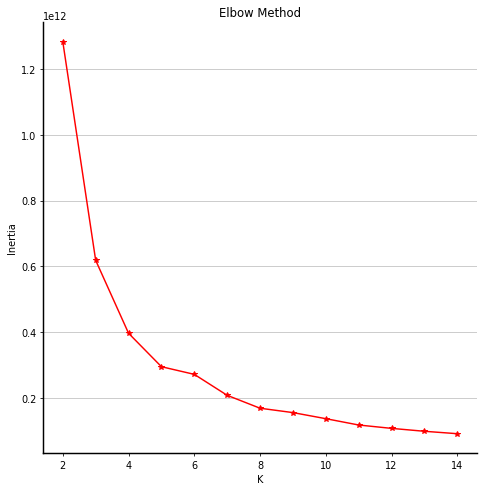

In [160]:
# Encontrar la cantidad óptima de clústeres, mediante el método del codo
from sklearn.metrics.cluster import silhouette_samples
sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters = k)
    y_predict = km.fit_predict(train)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(train, y_predict, metric="euclidean"))

# Gráfica del método del codo
fig, ax = plt.subplots(figsize = (8,8), dpi = 70)
plt.plot(K, sum_of_squared_distances, "r-*")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.show()

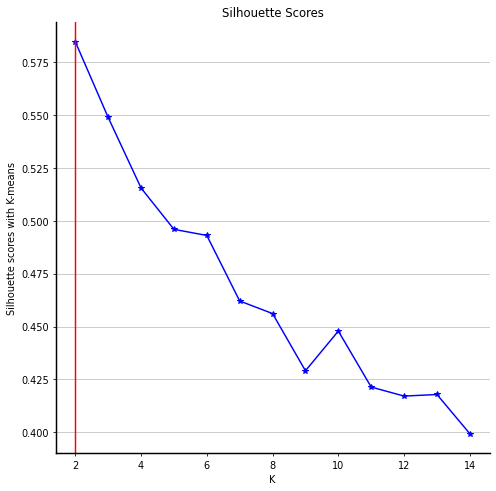

In [161]:
# Gráfica de silueta
fig, ax = plt.subplots(figsize = (8,8), dpi = 70)
plt.plot(K, silhouette_scores, "b-*")
plt.xlabel("K")
plt.ylabel("Silhouette scores with K-means")
plt.title("Silhouette Scores")
plt.axvline(x = 2, color = "r")
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.show()

Parece ser que el número óptimo de clusters es 2. Por lo que se utilizará este valor para K

In [164]:
# Aplicar KMeans con 2 clústeres
kmeans = KMeans(n_clusters=2)
kmeans.fit(train)
y_kmeans = kmeans.predict(train)

# Agregar la asignación de clústeres como una columna adicional en los datos
df = pd.DataFrame(train, columns=['modelo', 'marca', 'precio', 'version', 'año', 'kms', 'puertas'])
df['Cluster'] = y_kmeans

silhouette_avg = silhouette_score(train, y_kmeans)

print("Coeficiente de silueta sobre los datos:", silhouette_avg)

df.value_counts('Cluster')


Coeficiente de silueta sobre los datos: 0.5848548787040656


Cluster
0    477
1    385
Name: count, dtype: int64

c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\BI-Sabroson\BI-Esculapio\env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

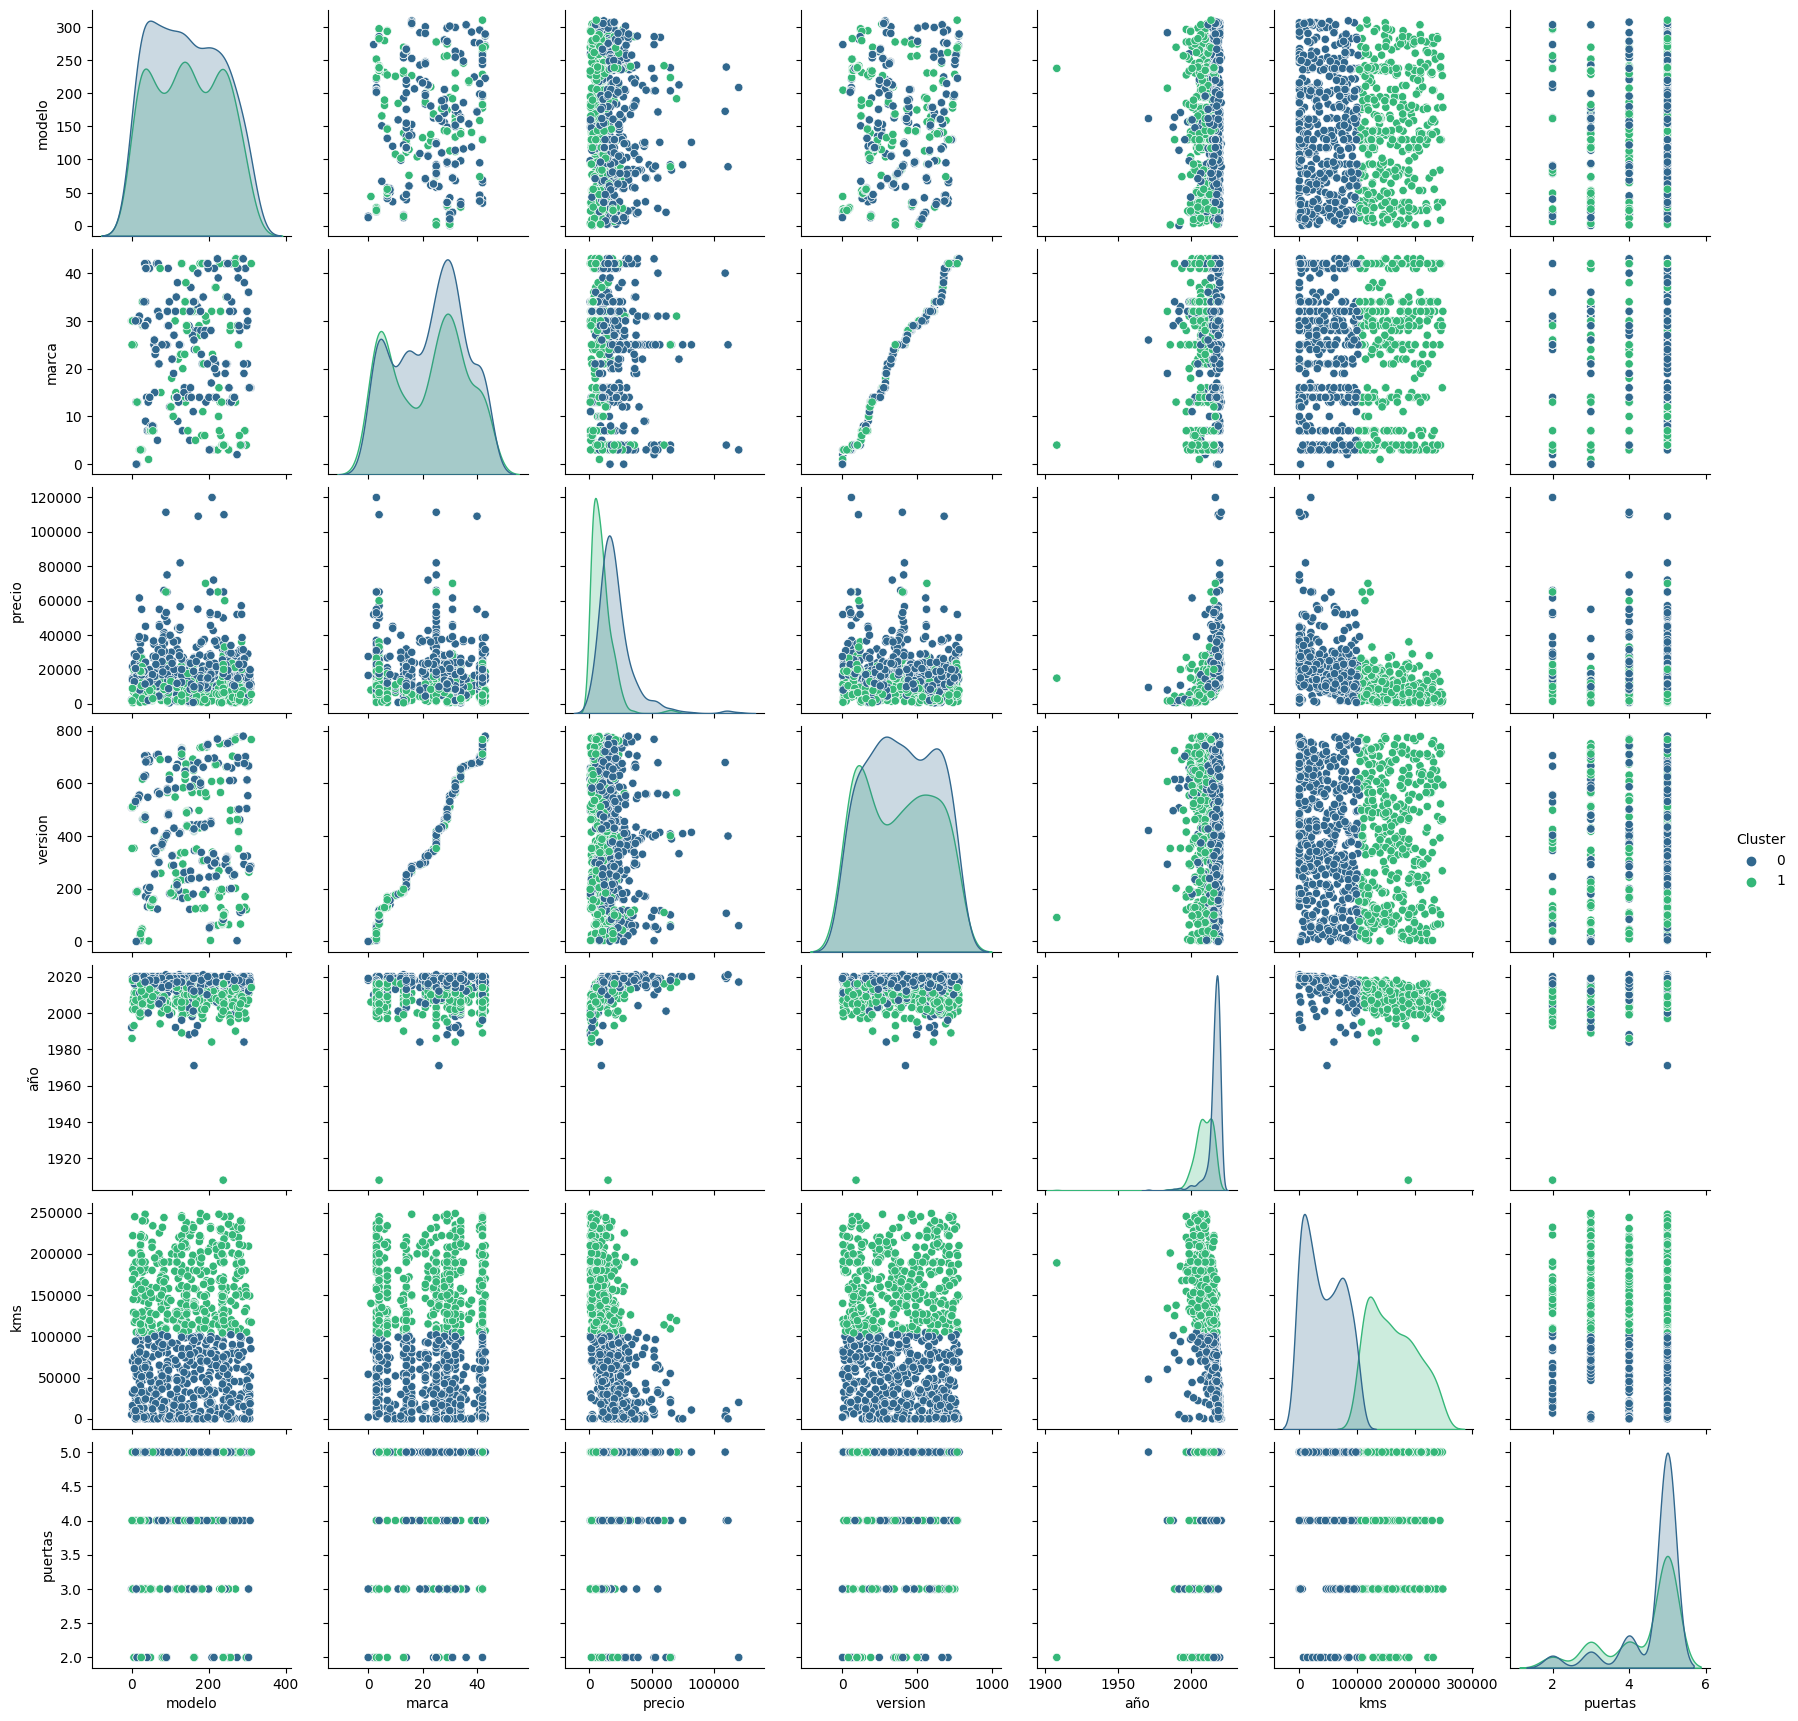

In [163]:
# Crear pair plot

sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

## Evaluación de Métricas

## Conclusiones

Luego de validar con las métricas de evaluación es posible decir que el algoritmo no puede ser utilizado con confianza para determinar el precio de un automovil. Sin embargo, gracias a los coeficientes Lasso es posible empezar a entender las diferentes columnas que son influyentes en el cambio del precio como lo es la fecha de publicación, el tipo de combustible, el número de puertas (aunque esto es más una consecuencia que causa pues relaciona el número de puertas a que es más costoso debido a que los deportivos son más costosos per se, no al revés) y el año del carro.

Estas columnas brindan luces para empezar una nueva iteración de los datos para encontrar un mejor modleo que se ajuste mucho mejor a los datos.